In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import date, datetime, timedelta


In [6]:

ticker = 'TSLA'
tsla = yf.download(ticker, start='2024-01-01', end='2024-11-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600


In [8]:
tsla.isnull().sum()

Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [9]:
tsla.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2024-10-28,262.510010,262.510010,273.540009,262.239990,270.000000,107653600
2024-10-29,259.519989,259.519989,264.980011,255.509995,264.510010,80521800
2024-10-30,257.549988,257.549988,263.350006,255.820007,258.040009,53993600
2024-10-31,249.850006,249.850006,259.750000,249.250000,257.989990,66575300


In [10]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2024-01-02 to 2024-10-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  211 non-null    float64
 1   (Close, TSLA)      211 non-null    float64
 2   (High, TSLA)       211 non-null    float64
 3   (Low, TSLA)        211 non-null    float64
 4   (Open, TSLA)       211 non-null    float64
 5   (Volume, TSLA)     211 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.5 KB


<Axes: xlabel='Date'>

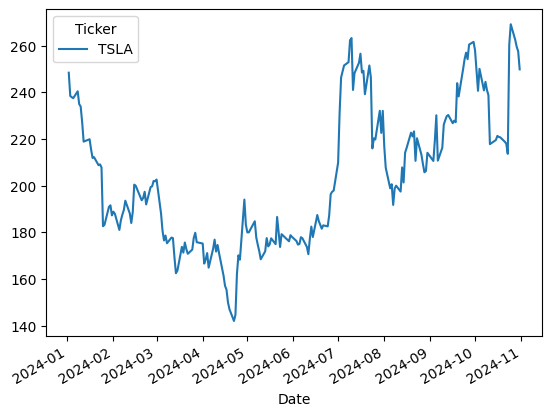

In [11]:
tsla['Close'].plot()


<Axes: xlabel='Date'>

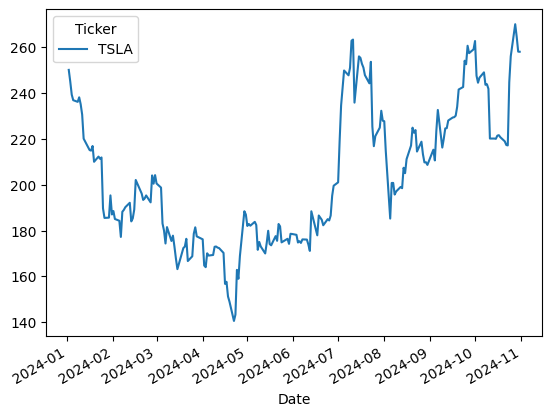

In [12]:
tsla['Open'].plot()

In [13]:

tsla['Close Rolling 10'] = tsla['Close'].rolling(window=10,min_periods=1).mean()
tsla.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,248.419998
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,243.434998
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,241.599996
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,240.572498
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,240.547998
2024-01-09,234.960007,234.960007,238.960007,232.039993,238.110001,96705700,239.616666
2024-01-10,233.940002,233.940002,235.500000,231.289993,235.100006,91628500,238.805714
2024-01-11,227.220001,227.220001,230.929993,225.369995,230.570007,105873600,237.357500


<Axes: xlabel='Date'>

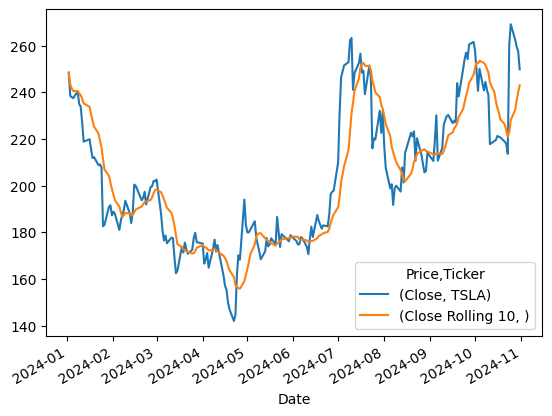

In [14]:
tsla[['Close','Close Rolling 10']].plot()


In [15]:
tsla['Close Rolling 30'] = tsla['Close'].rolling(window=30,min_periods=1).mean()

In [16]:
tsla['Close Rolling 50'] = tsla['Close'].rolling(window=50,min_periods=1).mean()
tsla

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,248.419998,248.419998,248.419998
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,243.434998,243.434998,243.434998
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,241.599996,241.599996,241.599996
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,240.572498,240.572498,240.572498
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,240.547998,240.547998,240.547998
...,...,...,...,...,...,...,...,...,...
2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900,228.179002,238.804667,230.569401
2024-10-28,262.510010,262.510010,273.540009,262.239990,270.000000,107653600,232.514003,239.995668,231.497201


<Axes: xlabel='Date'>

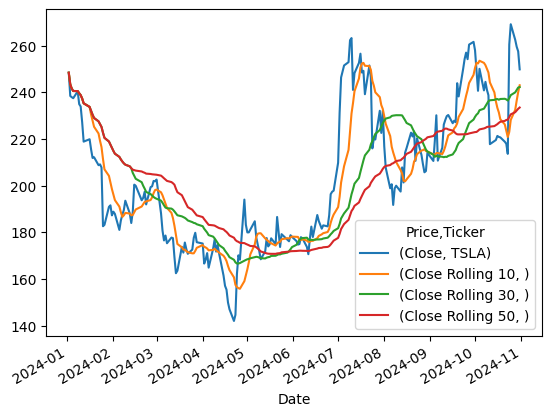

In [17]:
tsla[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [18]:
tsla['CMA']=tsla['Close'].expanding().mean()

<Axes: xlabel='Date'>

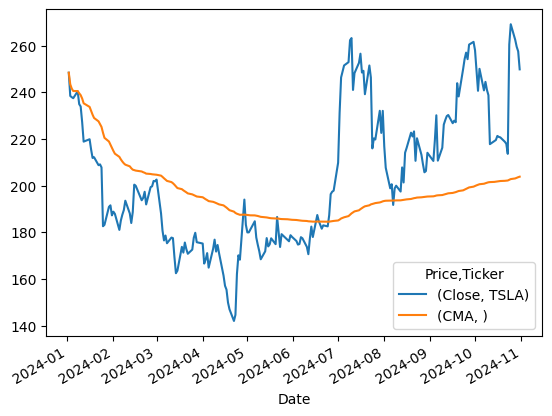

In [19]:
tsla[['Close','CMA']].plot()

In [20]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
adf_test(tsla['Close'])

ADF Statistics: -1.9224338822572429
p- value: 0.32158220653639696
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
tsla['First Difference'] = tsla['Close']-tsla['Close'].shift(1)

In [23]:
tsla

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,248.419998,248.419998,248.419998,248.419998,NaN
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,243.434998,243.434998,243.434998,243.434998,-9.970001
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,241.599996,241.599996,241.599996,241.599996,-0.520004
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,240.572498,240.572498,240.572498,240.572498,-0.439987
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,240.547998,240.547998,240.547998,240.547998,2.959991
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,269.190002,269.190002,269.489990,255.320007,256.010010,161611900,228.179002,238.804667,230.569401,202.830725,8.709991
2024-10-28,262.510010,262.510010,273.540009,262.239990,270.000000,107653600,232.514003,239.995668,231.497201,203.117645,-6.679993


In [24]:
adf_test(tsla['First Difference'].dropna())

ADF Statistics: -14.908219663465415
p- value: 1.4718750118808361e-27
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

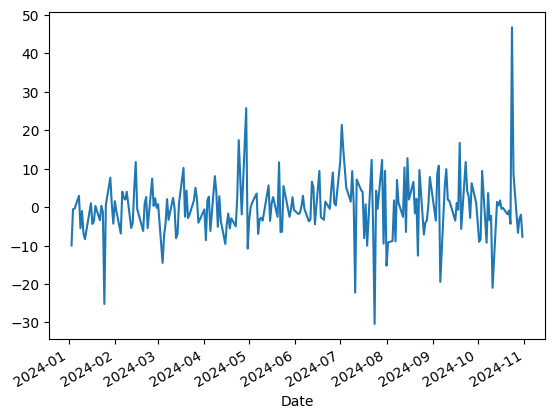

In [25]:
tsla['First Difference'].dropna().plot()

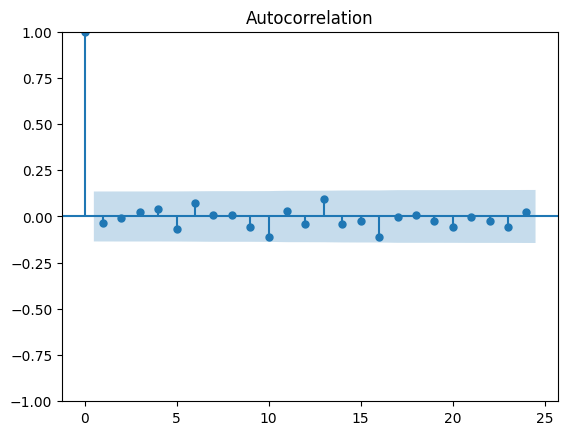

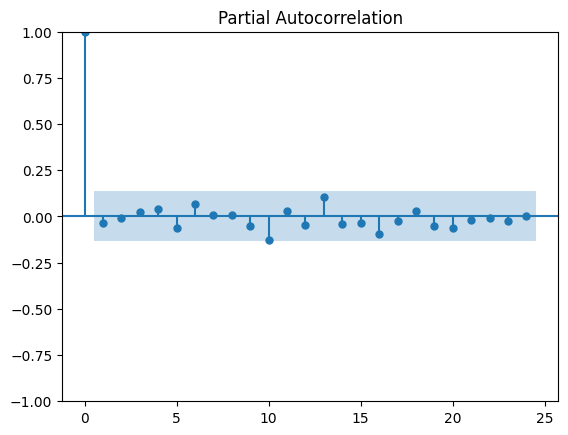

In [26]:
acf = plot_acf(tsla["First Difference"].dropna())
pacf = plot_pacf(tsla["First Difference"].dropna())

In [27]:
model_ARIMA=ARIMA(tsla['Close'],order=(1,1,2))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Divya Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Divya Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Divya Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  211
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -733.256
Date:                Tue, 17 Dec 2024   AIC                           1474.512
Time:                        13:28:42   BIC                           1487.900
Sample:                             0   HQIC                          1479.924
                                - 211                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9668      0.051    -18.981      0.000      -1.067      -0.867
ma.L1          0.9387      0.091     10.334      0.000       0.761       1.117
ma.L2         -0.0479      0.073     -0.652      0.514      -0.192       0.096
sigma2        63.0830      3.086     20.439      0.000      57.034      69.132
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               397.09
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.62   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
tsla.index


DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', name='Date', length=211, freq=None)

In [36]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2024,1,2),end=datetime(2024,10,31))
residuals=tsla['Close']-pred_arima

<Axes: xlabel='Date'>

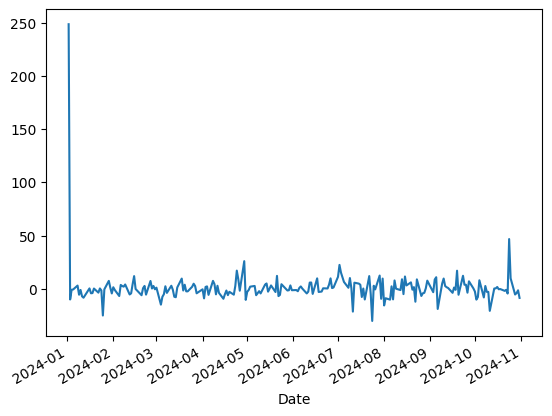

In [37]:
model_ARIMA_fit.resid.plot()


<Axes: ylabel='Density'>

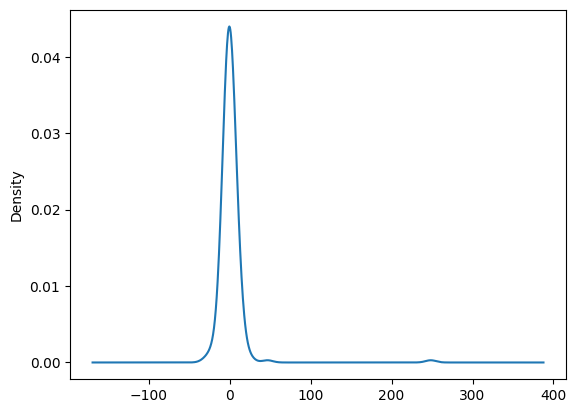

In [38]:
model_ARIMA_fit.resid.plot(kind='kde')

In [39]:
tsla['Predicted_ARIMA']=pred_arima

<Axes: xlabel='Date'>

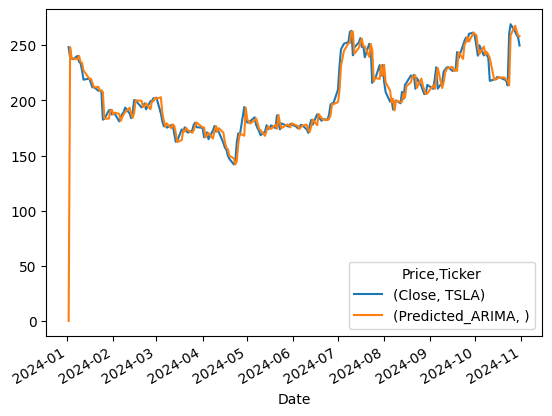

In [40]:
tsla[['Close','Predicted_ARIMA']].plot()

c:\Users\Divya Patil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


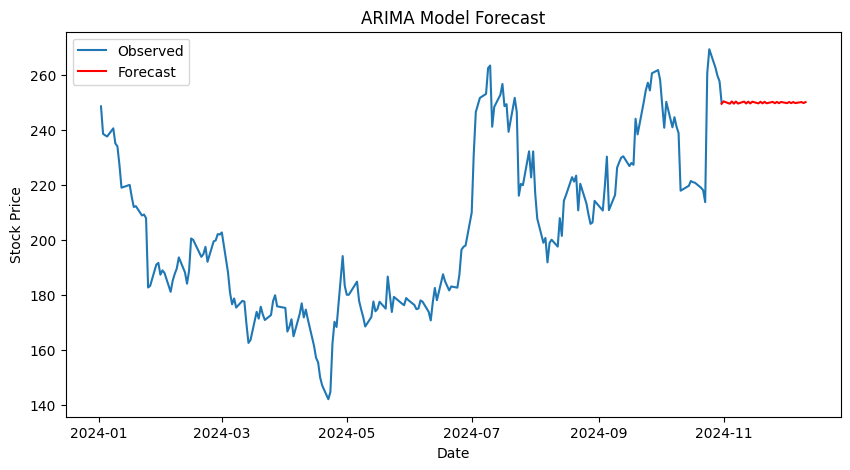

In [44]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=tsla.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(tsla['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()